<a href="https://colab.research.google.com/github/PauloQuirinoCD/Projeto_Salary/blob/main/Projeto_Aplica%C3%A7%C3%A3o_de_M%C3%A9todos_de_machine_learning(salary)_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

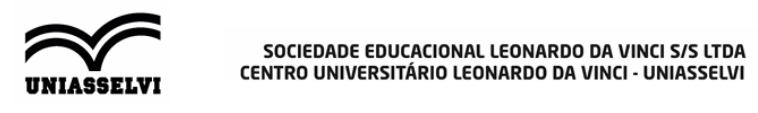

**Nome do Acadêmico:** Paulo Quirino
**Matrícula:** 3667379

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina - Etapa III

## Estimar o valor de salário na área de Tecnologia


Com o objetivo de criar um modelo preditivo que seja capaz de predizer com novos dados uma estimativa de salário baseado nas variáveis fornecidas pelo conjunto de dados.

Atualmente as profissões da área de TI, em especial as relacionadas à análise dados, tem ganhado grande relevância no mercado de trabalho de um modo geral. Apesar de não ser uma área nova, a demanda por profissionais ainda permanece crescente por conta da escassez de quadros qualificados para ocupar as vagas disponíveis nesse mercado em ascensão.
Dado o déficit de mão de obra, as profissões relacionadas a área de tecnologia possuem um bom atrativo com relação a média salarial, em sua maioria, e por essa razão nosso projeto escolheu criar um modelo proditivo, que nós forneca uma estimativa do salarial para trabalhadores da área de tecnologias, de acordo com algumas variáveis.


>## Objetivo


Criar uma máquina preditiva capaz de prever uma estimativa de salário baseada em um conjunto de dados no qual a remuneração está relacionada com as variáveis idade, sexo, grau de educação, cargo e experiência.

>## Especificação Técnica


O dataset usado para este projeto foi extraido da platafome Kaggle, O conjunto de dados pode ser encontrado neste link: (https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer).
Este conjunto de dados contém informações sobre os salários dos funcionários de uma empresa. Cada linha representa um funcionário diferente e as colunas incluem informações como idade, sexo, nível educacional, cargo, anos de experiência e salário, o arquivo está no formato ".csv"

Colunas:

###Idade:
 Esta coluna representa a idade de cada funcionário em anos. Os valores nesta coluna são numéricos.

###Sexo:
 Esta coluna contém o sexo de cada funcionário, que pode ser masculino ou feminino. Os valores nesta coluna são categóricos.

###Nível de escolaridade:
 Esta coluna contém o nível de escolaridade de cada funcionário, que pode ser ensino médio, bacharelado, mestrado ou doutorado. Os valores nesta coluna são categóricos.

###Cargo:
 Esta coluna contém o cargo de cada funcionário. Os cargos podem variar dependendo da empresa e podem incluir cargos como gerente, analista, engenheiro ou administrador. Os valores nesta coluna são categóricos.

###Anos de Experiência:
 Esta coluna representa o número de anos de experiência de trabalho de cada funcionário. Os valores nesta coluna são numéricos.

###Salário:
(Nosso Target) Esta coluna representa o salário anual de cada funcionário em dólares americanos. Os valores nesta coluna são numéricos e podem variar dependendo de fatores como cargo, anos de experiência e nível educacional.


Depois de coletar os dados, é preciso prepará-los para o modelo de predição através das etapas de tratamento de limpeza e preprocessamento.

##Tarefa de Aprendizado:
Será aplicado a tarefa de Regressão

##Modos de aprendizado:
Supervisionado.

##Algoritmos Avaliados:
LinearRegression, SVR(Support Vector Regression) e DecisionTreeRegressor

##Métrica utilizadas:
mean_squared_error, mean_absolute_error


Importando todas as biliotecas necessárias para o desenvolvimento do projeto

# Conexão com a Base de dados e Informações iniciais


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [123]:
dados = pd.read_csv("/content/Salary Data.csv")

In [124]:
dados.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [125]:
dados.shape

(375, 6)

In [126]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [127]:
dados.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


descobrindo que a três variáveis numericas tem uma correlação muito forte entre elas. corroborando com  ideia de aplicar um modelo de regressão

In [128]:
correlacao = dados.corr()
correlacao

<ipython-input-128-60f7e23ec944>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr()


,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


In [129]:
# visualizando a ditribuição e correlação entre as variáveis, atravéz de gráficos

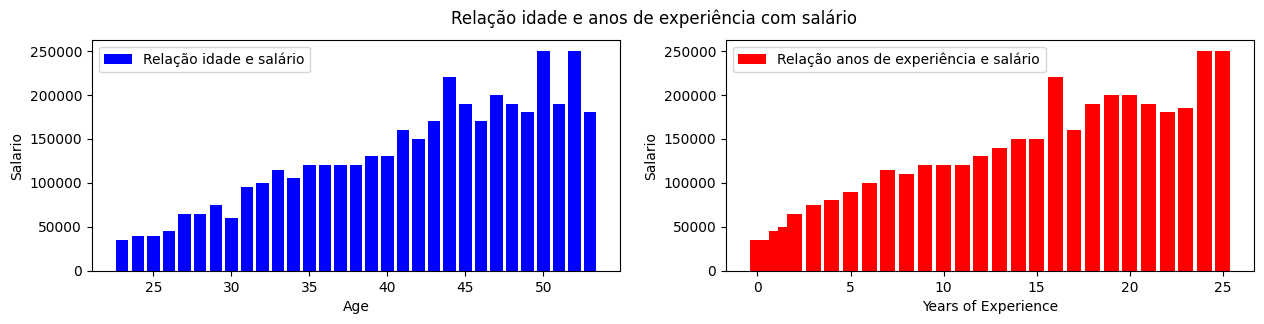

In [130]:
# como estão distribuidas as variáveis idade e experiência com relação ao salario
figura = plt.figure(figsize=(15,3))
figura.suptitle('Relação idade e anos de experiência com salário')

figura.add_subplot(121)
plt.bar(dados['Age'], dados['Salary'], label='Relação idade e salário', color='b', lw=0.8)
plt.xlabel('Age')
plt.ylabel('Salario')
plt.legend()


figura.add_subplot(122)
plt.bar(dados['Years of Experience'], dados['Salary'], label='Relação anos de experiência e salário', color='r', lw=0.8)
plt.xlabel('Years of Experience')
plt.ylabel('Salario')
plt.legend()

plt.show(figura)

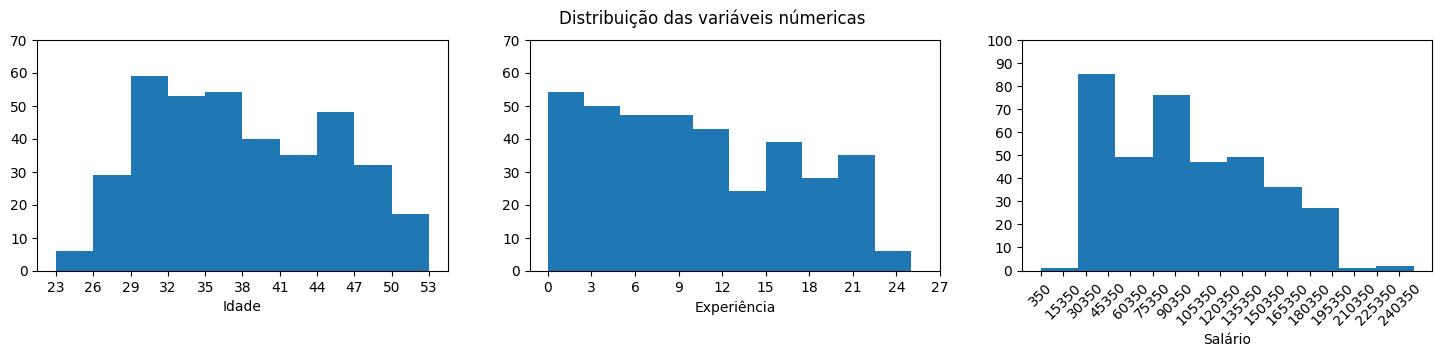

In [131]:
#CONFIGURAR DEPOIS O TAMANHO DA FONTE DO ROTULOS
fig = plt.figure(figsize=(18, 3))
fig.suptitle('Distribuição das variáveis númericas')

ax1 = fig.add_subplot(131)
plt.hist(dados['Age'])
ax1.set_xlabel('Idade')
ax1.set_xticks(np.arange(23, 53 + 3, 3))
ax1.set_yticks(np.arange(0, 80, 10))

ax2 = fig.add_subplot(132)
plt.hist(dados['Years of Experience'])
ax2.set_xlabel('Experiência')
ax2.set_xticks(np.arange(0, 25 + 3, 3))
ax2.set_yticks(np.arange(0, 80, 10))

ax3 = fig.add_subplot(133)
plt.hist(dados['Salary'])
ax3.set_xlabel('Salário')
ax3.set_xticks(np.arange(350, 250000, 15000))
ax3.set_yticks(np.arange(0, 100 + 10, 10))
plt.xticks(rotation=45)


plt.show()


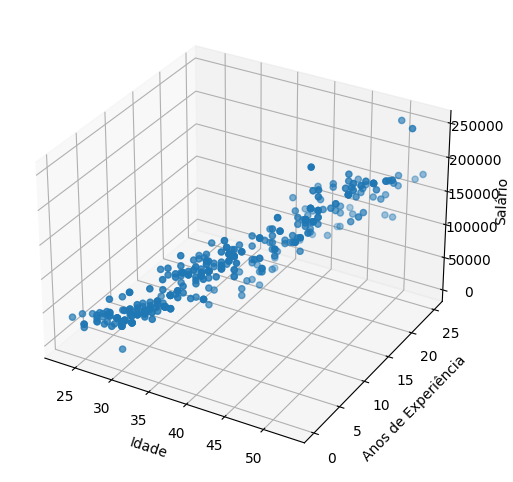

In [132]:
# Aqui foi feito um gráfico 3d, para termos uma visão mais clara sobre  variávei numéricas e suas fortes correlações.
# CONFIGURAR OS ESPAÇAMENTOS

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotagem do gráfico de dispersão tridimensional
ax.scatter(dados['Age'], dados['Years of Experience'], dados['Salary'])

# Configuração dos rótulos dos eixos
ax.set_xlabel('Idade')
ax.set_ylabel('Anos de Experiência')
ax.set_zlabel('Salário')

# Exibição do gráfico
plt.show()

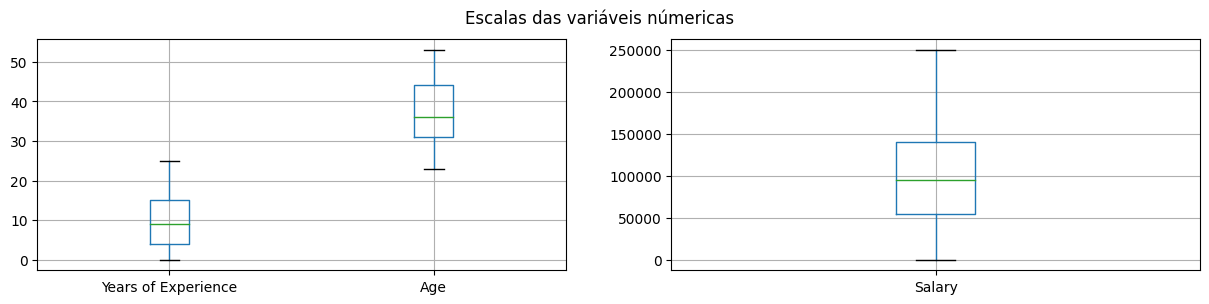

In [133]:
figura = plt.figure("Boxplots", figsize=(15, 3))
figura.suptitle('Escalas das variáveis númericas')

figura.add_subplot(121)
ax1 = dados.boxplot(column=['Years of Experience', 'Age'])


figura.add_subplot(122)
ax2 = dados.boxplot(column='Salary')

plt.show()

In [146]:
# Me veio um pensamento, será se os salários são igualitários  entre homens e mulheres nesta base de dados ?

In [147]:
quant_Mulher = dados.loc[dados['Gender'] == 'Female'].value_counts().sum()
quant_Homem = dados.loc[dados['Gender'] == 'Male'].value_counts().sum()
print(f"{quant_Mulher * 100 / len(dados)} % de Mulheres \n{quant_Homem * 100 / len(dados)} % de Homens")

47.733333333333334 % de Mulheres 
51.733333333333334 % de Homens


In [138]:
# Média por gênero dos salários
dados.groupby('Gender')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,179.0,97011.173184,45916.141054,35000.0,50000.0,90000.0,140000.0,190000.0
Male,194.0,103867.783505,50182.461438,350.0,60000.0,97500.0,140000.0,250000.0


#Métodos de Pré-Processamento


LIMPEZA DOS DADOS

Nesta etapa, o foco é identificar e lidar com problemas nos dados, como valores ausentes, dados duplicados, erros de digitação, valores inconsistentes ou outliers.

A limpeza de dados para esta base envolve técnicas como preenchimento de valores ausentes, tratamento de outliers entre outras tecnicas,
serão usadas a variáveis 'Age' e 'Years of Experience' nas escalas originais juntas com as 'Gerder', 'Education Level' e 'Job Titlle' que serão transformadas em numericas categóricas, juntas serão as variáveis independentes e a variável Target será 'Salary'.
O conjunto de dados depois da limpaza será submetido a pelos menos três máquinas preditivas diferentes para que possamos ter um ponto de referência sobre as metricas e estabelecer uma meta reduzindo os erros ponderados entre estas máquinas.


In [ ]:
# verificando valores nulos
dados.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [ ]:
# qual a porcentagem dos valores nulos com relação ao tamanho do dataset
porcentagem_nulos = dados.isnull().mean() * 100
porcentagem_nulos

Age                    0.533333
Gender                 0.533333
Education Level        0.533333
Job Title              0.533333
Years of Experience    0.533333
Salary                 0.533333
dtype: float64

In [ ]:
# com apena 0,53% de valores nunos, resovi dropa-los
dados.dropna(inplace=True)

In [ ]:
dados.shape

(373, 6)

In [ ]:
dados.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
# somente nesta coluna foi percebido um valor muito fora da média dos valores desta variável
dados['Salary'].describe()

count       373.000000
mean     100577.345845
std       48240.013482
min         350.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: Salary, dtype: float64

In [ ]:
linha = dados.loc[dados['Salary'] == 350]
linha

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0


Para a correção desse Outlier fiz uma breve pesquisa no google sobre o valor de salário para o cargo de "Junior Business Operations Analyst". como a maioria dos resultados deu entre 3500 e 4000.
presumo que esse tenha sido um erro de digitação.
coloquei mais uma casa decimal de 350 para 3500.

In [ ]:
linha = dados.loc[259]
linha

Age                                                  29.0
Gender                                               Male
Education Level                                Bachelor's
Job Title              Junior Business Operations Analyst
Years of Experience                                   1.5
Salary                                              350.0
Name: 259, dtype: object

In [ ]:
dados['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
dados['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [ ]:
# para os valores categoricos das variáveis 'Gender' e 'Education Level' apliquei o get_dummies, por terem poucas vaiações nos valores
dados = pd.get_dummies(dados, columns=['Gender', 'Education Level'])
dados.head(10)

,Age,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,Software Engineer,5.0,90000.0,0,1,1,0,0
1,28.0,Data Analyst,3.0,65000.0,1,0,0,1,0
2,45.0,Senior Manager,15.0,150000.0,0,1,0,0,1
3,36.0,Sales Associate,7.0,60000.0,1,0,1,0,0
4,52.0,Director,20.0,200000.0,0,1,0,1,0
5,29.0,Marketing Analyst,2.0,55000.0,0,1,1,0,0
6,42.0,Product Manager,12.0,120000.0,1,0,0,1,0
7,31.0,Sales Manager,4.0,80000.0,0,1,1,0,0
8,26.0,Marketing Coordinator,1.0,45000.0,1,0,1,0,0
9,38.0,Senior Scientist,10.0,110000.0,0,1,0,0,1


In [ ]:
# esta variável tem muitos valores categorigos distintos
dados['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [ ]:
contador = dados['Job Title'].value_counts()
contador.head(35)

Director of Marketing                    12
Director of Operations                   11
Senior Business Analyst                  10
Senior Marketing Analyst                  9
Senior Marketing Manager                  9
Junior Business Analyst                   8
Senior Financial Analyst                  7
Junior Financial Analyst                  7
Junior Business Development Associate     7
Senior Project Manager                    7
Senior Data Scientist                     7
Senior Software Engineer                  6
Junior Marketing Coordinator              6
Senior Product Manager                    6
Senior Financial Manager                  5
Junior Operations Analyst                 5
Junior Project Manager                    5
Junior Marketing Specialist               5
Senior Product Designer                   5
Senior Operations Manager                 5
Senior Project Coordinator                5
Senior Data Engineer                      4
Senior Marketing Specialist     

In [ ]:
# como a grande maioria dos valores são referentes aos cargos "Director", "Senior" e "Junior" e outros com menor frequência,
# estes formam estes os criterios pra serem agrupados
# Criar uma nova coluna 'categoria' com base na coluna 'tittle job'
dados['Categoria_titilo_trabalho'] = np.where(dados['Job Title'].str.contains('Director'), 'Director',
                              np.where(dados['Job Title'].str.contains('Senior'), 'Senior',
                                       np.where(dados['Job Title'].str.contains('Junior'), 'Junior', 'Outros')))


In [ ]:
dados.head(10)

,Age,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Categoria_titilo_trabalho
0,32.0,Software Engineer,5.0,90000.0,0,1,1,0,0,Outros
1,28.0,Data Analyst,3.0,65000.0,1,0,0,1,0,Outros
2,45.0,Senior Manager,15.0,150000.0,0,1,0,0,1,Senior
3,36.0,Sales Associate,7.0,60000.0,1,0,1,0,0,Outros
4,52.0,Director,20.0,200000.0,0,1,0,1,0,Director
5,29.0,Marketing Analyst,2.0,55000.0,0,1,1,0,0,Outros
6,42.0,Product Manager,12.0,120000.0,1,0,0,1,0,Outros
7,31.0,Sales Manager,4.0,80000.0,0,1,1,0,0,Outros
8,26.0,Marketing Coordinator,1.0,45000.0,1,0,1,0,0,Outros
9,38.0,Senior Scientist,10.0,110000.0,0,1,0,0,1,Senior


In [ ]:
# agora com menos categorias, pode ser aplicado get_dummies() como foi feito para as outras variáveis categóricas
dados['Categoria_titilo_trabalho'].value_counts()

Senior      151
Outros       90
Junior       90
Director     42
Name: Categoria_titilo_trabalho, dtype: int64

In [ ]:
dados.drop('Job Title', axis=1, inplace=True)
dados.head(10)

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Categoria_titilo_trabalho
0,32.0,5.0,90000.0,0,1,1,0,0,Outros
1,28.0,3.0,65000.0,1,0,0,1,0,Outros
2,45.0,15.0,150000.0,0,1,0,0,1,Senior
3,36.0,7.0,60000.0,1,0,1,0,0,Outros
4,52.0,20.0,200000.0,0,1,0,1,0,Director
5,29.0,2.0,55000.0,0,1,1,0,0,Outros
6,42.0,12.0,120000.0,1,0,0,1,0,Outros
7,31.0,4.0,80000.0,0,1,1,0,0,Outros
8,26.0,1.0,45000.0,1,0,1,0,0,Outros
9,38.0,10.0,110000.0,0,1,0,0,1,Senior


In [ ]:
dados = pd.get_dummies(dados, columns=['Categoria_titilo_trabalho'])
dados

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Categoria_titilo_trabalho_Director,Categoria_titilo_trabalho_Junior,Categoria_titilo_trabalho_Outros,Categoria_titilo_trabalho_Senior
0,32.0,5.0,90000.0,0,1,1,0,0,0,0,1,0
1,28.0,3.0,65000.0,1,0,0,1,0,0,0,1,0
2,45.0,15.0,150000.0,0,1,0,0,1,0,0,0,1
3,36.0,7.0,60000.0,1,0,1,0,0,0,0,1,0
4,52.0,20.0,200000.0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,1,0,1,0,0,0,0,0,1
371,43.0,19.0,170000.0,0,1,0,1,0,1,0,0,0
372,29.0,2.0,40000.0,1,0,1,0,0,0,1,0,0
373,34.0,7.0,90000.0,0,1,1,0,0,0,0,0,1


# Separar o conjunto de dados em treino e teste

TREINO E TESTE

Na etapa seguinte a divisão de dados: Dividir o conjunto de dados em dados de treinamento e teste. Os dados de treinamento são usados para treinar o modelo, enquanto os dados de teste são usados para avaliar o desempenho do modelo em dados não vistos anteriormente. Essa divisão é importante para verificar a capacidade de generalização do modelo.
A separação ficou assim na variável x todas as variáveis imdependentes e o Target ficou na variável y.

In [ ]:
X = dados.drop(columns=['Salary'])
y = dados.Salary

# Sobre as máquinas preditivas
para este modelo serão usadas três máquinas diferentes, Regressão Linear, máquina de verto de suporte(SVM) e Árvores de Decisão.

Visto que os valores a serem preditos são númericos e contínuos, optou-se por usar essas três maquinas diferentes por algumas razões, Dos três modelos mencionados, LinearRegression e o Support Vector Machines (SVR) são mais sensíveis à falta de padronização ou normalização dos dados. Por outro lado, DecisionTreeRegressor e menos afetada por esse problema, e os três modelos trabalham baseados na regressão.

espara-se que os valores das métricas usadas com essas três máquinas inicialmente sejam nosso ponto de referência, que posteriomente serão feitas todas as alterações na base e nas máquinas afim de atingir os melhores valores possíveis, definindo a melhor máquina preditiva sobre essa base de dados.

# Regressão Linear:
Este modelo foi escolhido pela forte correlação entre as variáveis independentes do conjunto de dados.
A Regressão Linear pressupõe que as variáveis independentes estejam na mesma escala para que os coeficientes sejam interpretáveis corretamente. Se as variáveis independentes tiverem escalas muito diferentes, aquelas com valores maiores terão um impacto desproporcional nos coeficientes do modelo. Portanto, é recomendável padronizar ou normalizar as variáveis antes de aplicar a Regressão Linear para garantir uma interpretação correta dos coeficientes.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
y_pred_r = regressor.predict(X_test)

In [ ]:
y_pred_r

# SVM (Support Vector Machine)
SVM:
O SVM também pode ser afetado pela escala dos dados, uma vez que calcula distâncias entre pontos de dados. Se as variáveis independentes tiverem escalas muito diferentes, a influência das variáveis com escalas maiores pode dominar o modelo. Portanto, é aconselhável padronizar ou normalizar as variáveis antes de ajustar um SVM.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_regressor = SVR(kernel='linear')

In [ ]:
svm_regressor.fit(X_train, y_train)


In [ ]:
y_pred_s = svm_regressor.predict(X_test)


In [ ]:
y_pred_s

#Árvores de Decisão
Elas tomam decisões com base em regras de divisão nas variáveis independentes, que não são afetadas pela escala dos dados. Portanto, a padronização ou normalização dos dados não é necessária ao utilizar Árvores de Decisão.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tree_regressor = DecisionTreeRegressor()

In [ ]:
tree_regressor.fit(X_train, y_train)


In [ ]:
y_pred_a = tree_regressor.predict(X_test)

In [ ]:
y_pred_a

#Metricas

As métricas de mean_squared_error(MSE) e mean_absolute_error(MAE) são apropriadas para este regressão devido à sua interpretação direta, sensibilidade a desvios e propriedades estatísticas bem estabelecidas, isso facilita a interpretação dos resultados e permite comparações consistentes.

In [ ]:


r2 = r2_score(y_test, y_pred_r)
mse = mean_squared_error(y_test, y_pred_r)


print("Erro quadrado (Regressão):", r2)
print("Erro quadrado médio (Regressão):", mse)


Erro quadrado (Regressão): 0.8884237685184517
Erro quadrado médio (Regressão): 267513189.0227117


In [ ]:
r2 = r2_score(y_test, y_pred_s)
mse = mean_squared_error(y_test, y_pred_s)


print("Erro quadrado (SVM):", r2)
print("Erro quadrado médio (SVM):", mse)

Erro quadrado (SVM): 0.5634711425420678
Erro quadrado médio (SVM): 1046613828.1281168


In [ ]:
r2 = r2_score(y_test, y_pred_a)
mse = mean_squared_error(y_test, y_pred_a)


print("Erro quadrado (Arvore de decisão):", r2)
print("Erro quadrado médio (Arvore de decisão):", mse)

Erro quadrado (Arvore de decisão): 0.8485955450181911
Erro quadrado médio (Arvore de decisão): 363004629.6296296


REFLEXÃO SOBRE OS OBJETIVOS E TECNICAS USADAS


Posteriormente, será feita a transformação de dados: Nesta etapa, os dados podem precisar ser transformados ou reformatados para melhor se adequarem às necessidades da análise. Isso pode envolver a normalização ou padronização de valores, codificação de variáveis categóricas, discretização de dados contínuos, entre outros processos.